In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
print(data.shape)
data['classification'].unique()

(400, 26)


array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [12]:
data.classification = data.classification.replace("ckd\t","ckd")

In [13]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [14]:
data.drop('id', axis = 1, inplace = True)

In [15]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [16]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [17]:
data_drop = data.dropna(axis=0)
print(f"Data shape before deletion: {data.shape}")
print(f"Data shape after deletion: {data_drop.shape}")

Data shape before deletion: (400, 25)
Data shape after deletion: (158, 25)


In [18]:
data_drop['wc']=data_drop['wc'].replace(["\t6200","\t8400"],[6200,8400])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_78428\203949819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['wc']=data_drop['wc'].replace(["\t6200","\t8400"],[6200,8400])


In [19]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    object 


In [20]:
data_drop['pcv'] = data_drop['pcv'].astype('int')
data_drop['wc'] = data_drop['wc'].astype('int')
data_drop['rc'] = data_drop['rc'].astype('float')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_78428\1615963560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['pcv'] = data_drop['pcv'].astype('int')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_78428\1615963560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['wc'] = data_drop['wc'].astype('int')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_78428\1615963560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [21]:
object_data_drop = data_drop.select_dtypes(include='object')
object_data_drop.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
9,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes,ckd
11,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no,ckd
14,normal,abnormal,present,present,yes,yes,yes,poor,yes,no,ckd
20,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes,ckd


In [22]:
dictonary = {
    "rbc":{
        "normal":0,
        "abnormal":1,
    },
    "pc":{
        "normal":0,
        "abnormal":1,
    },
    "pcc":{
        "present":1,
        "notpresent":0,
    },
    "ba":{
        "notpresent":0,
        "present":1,
    },
    "htn":{
        "yes":1,
        "no":0,
    },
    "dm":{
        "yes":1,
        "no":0,
    },
    "cad":{
        "yes":1,
        "no":0,
    },
    "appet":{
        "good":1,
        "poor":0,
    },
    "pe":{
        "yes":1,
         "no":0,
    },
    "ane":{
        "yes":1,
        "no":0,
    }
}

In [23]:
data_drop = data_drop.replace(dictonary)
data_drop.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,ckd
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,ckd
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,ckd
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,ckd
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,ckd


In [25]:
data_drop

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,ckd
9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,ckd
11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,ckd
14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,ckd
20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,...,47,6700,4.9,0,0,0,1,0,0,notckd
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,...,54,7800,6.2,0,0,0,1,0,0,notckd
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,...,49,6600,5.4,0,0,0,1,0,0,notckd
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,...,51,7200,5.9,0,0,0,1,0,0,notckd


In [26]:
data_drop['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [27]:
map={'ckd':1, 'notckd':0}
data_drop['classification']=data_drop['classification'].map(map)

In [30]:
data_drop['classification']=data_drop['classification'].astype(int)

<Axes: >

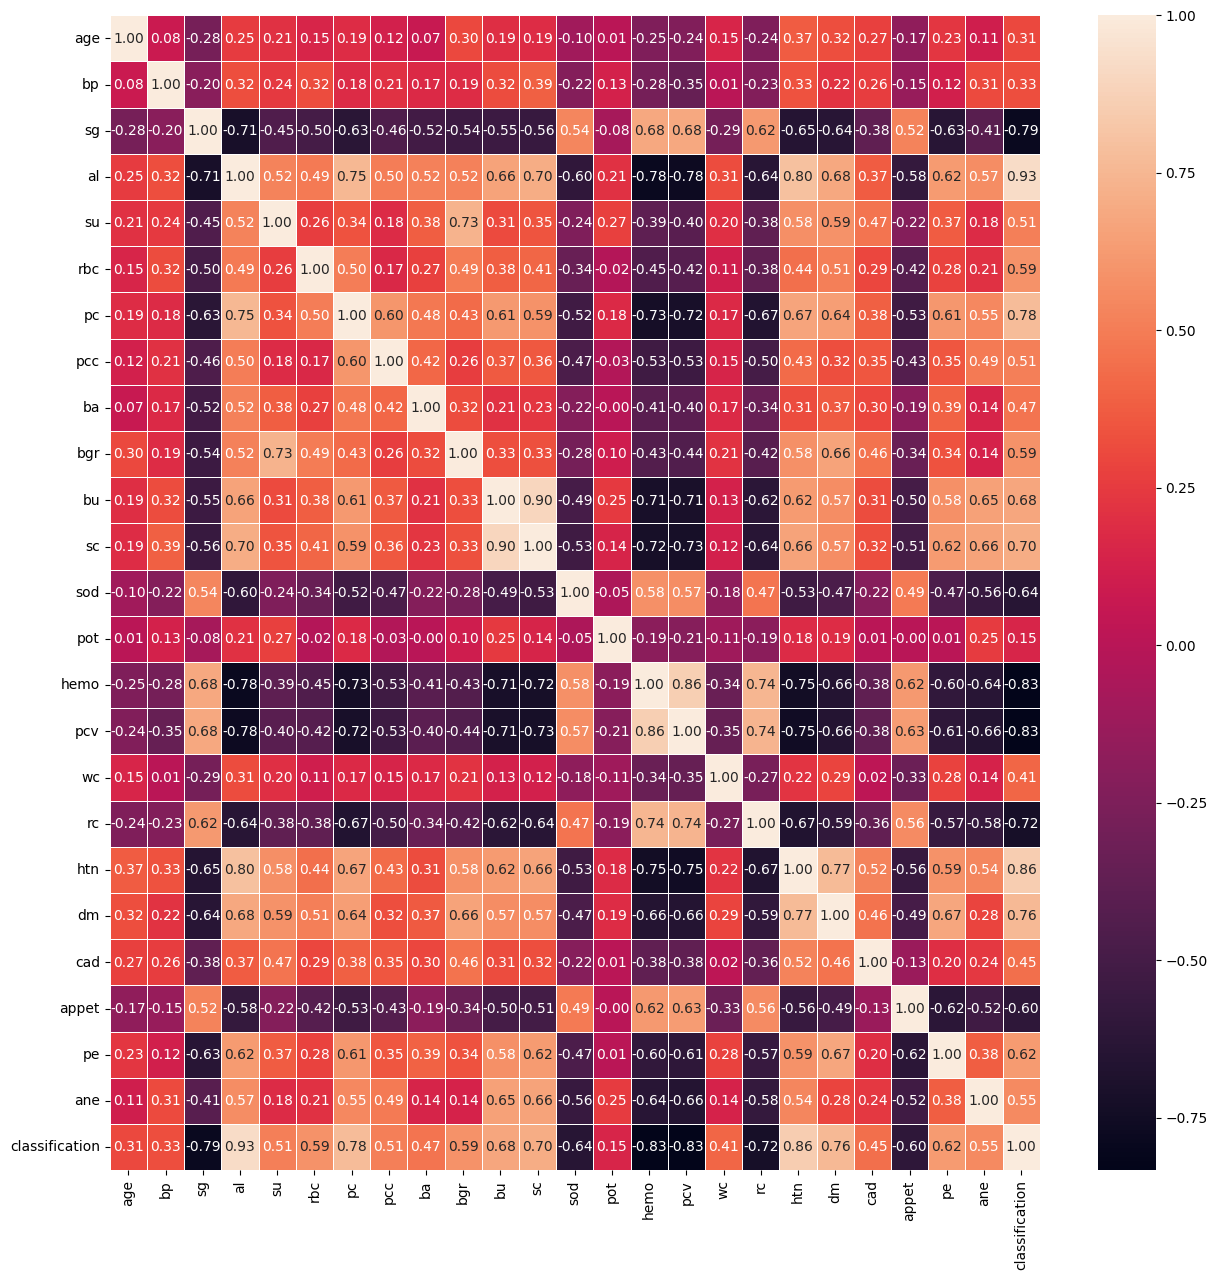

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(data_drop.corr(),annot=True,fmt=".2f",linewidths=0.6)

In [32]:
X = data_drop.drop(["sg","sod","hemo","pcv","rc","appet","classification"],axis=1)
y = data_drop['classification']

In [33]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [36]:
from sklearn.metrics import confusion_matrix , accuracy_score
predict = model.predict(X_test)
confusion_matrix(y_test,predict)

array([[23,  0],
       [ 0,  9]], dtype=int64)

In [37]:
print(f"Accuracy of model is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")


Accuracy of model is 100.0%


In [38]:
import pickle
pickle.dump(model,open("kidney.pkl","wb"))